In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [2]:
data = pd.read_csv('Catalogues/NGC1027_9_Pop1.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,BPmag-RPmag,min,max,std,avg,mode,median,Q1,Q3,excl
0,40.582100,61.300463,465620501239598464,0.9339,0.0764,2.465,-1.724,1.762,31,1.387,...,1.705378,0.000000e+00,0.754065,2.631297e-01,0.641707,0.74,7.540653e-01,7.540653e-01,7.540653e-01,0.157446
1,40.654812,61.344513,465621050995366528,0.9779,0.4969,1.598,-0.753,1.409,95,NaN,...,1.262880,0.000000e+00,0.814608,3.176343e-01,0.152343,0.00,0.000000e+00,0.000000e+00,2.802597e-45,0.812986
2,40.657003,61.368764,465621149774787840,0.9705,0.1360,2.652,-1.619,2.100,31,1.338,...,1.956467,8.436255e-01,0.843626,1.110223e-16,0.843626,0.84,8.436255e-01,8.436255e-01,8.436255e-01,0.000000
3,41.018122,61.311169,465622253583048064,1.0119,0.6141,1.341,-0.821,1.061,95,NaN,...,1.359177,0.000000e+00,0.717572,3.495767e-01,0.278017,0.00,2.802597e-45,2.802597e-45,7.175724e-01,0.612559
4,40.829255,61.271582,465622558523828096,0.9092,0.0229,2.522,-1.697,1.865,31,1.462,...,1.273263,0.000000e+00,0.708770,3.101427e-01,0.226093,0.00,8.394608e-03,4.060967e-07,7.087699e-01,0.723823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,40.807171,61.931006,465791200421653376,1.0341,0.0247,5.487,-3.732,4.022,31,1.474,...,1.209364,0.000000e+00,0.751140,8.879265e-02,0.740492,0.74,7.511395e-01,7.511395e-01,7.511395e-01,0.014175
241,40.520327,61.946107,465793498218681856,0.8723,0.4723,2.737,-1.706,2.140,95,NaN,...,2.574420,2.802597e-45,0.727646,5.999754e-02,0.722520,0.72,7.276464e-01,7.276464e-01,7.276464e-01,0.007316
242,40.509601,61.955722,465793498219208704,0.8890,0.0790,2.769,-1.785,2.117,31,1.405,...,1.589678,8.343788e-06,0.713207,1.272859e-01,0.660650,0.70,7.132072e-01,7.132072e-01,7.132072e-01,0.223594
243,40.401710,61.947703,465793983560482048,0.9117,0.0283,2.898,-2.072,2.027,31,1.456,...,1.303009,0.000000e+00,0.702793,1.410689e-01,0.029632,0.00,2.802597e-45,0.000000e+00,5.625475e-12,0.957933


/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


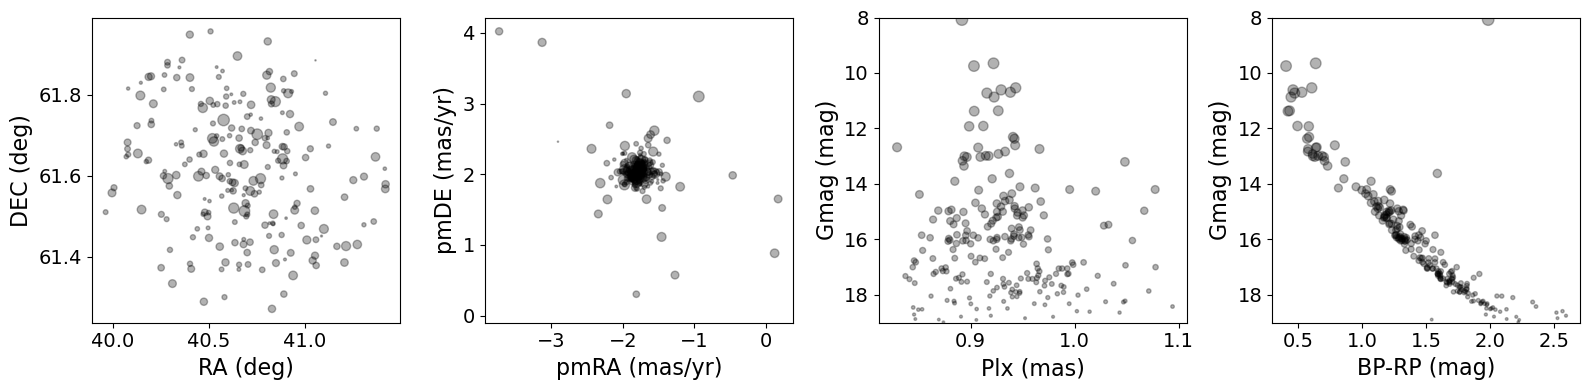

In [3]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,8)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,8)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)


In [4]:
population = data

## First Analysis

### RA,DEC

In [5]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data,"RAJ2000","DEJ2000",20,0)

In [6]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 40.6651
DEC = 61.6200


Text(0, 0.5, 'DEC (deg)')

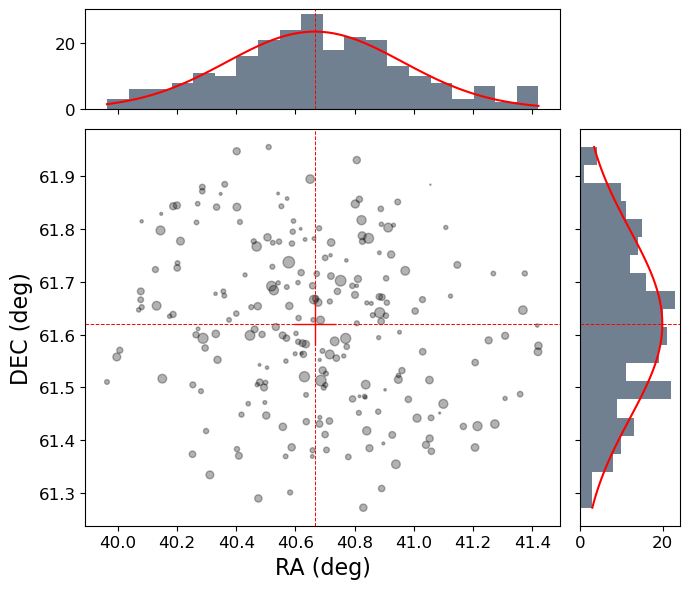

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [8]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data,"pmRA","pmDE",20,0)

In [9]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -1.7948
pmDE = 2.0264


Text(0, 0.5, 'pmde (mas/yr)')

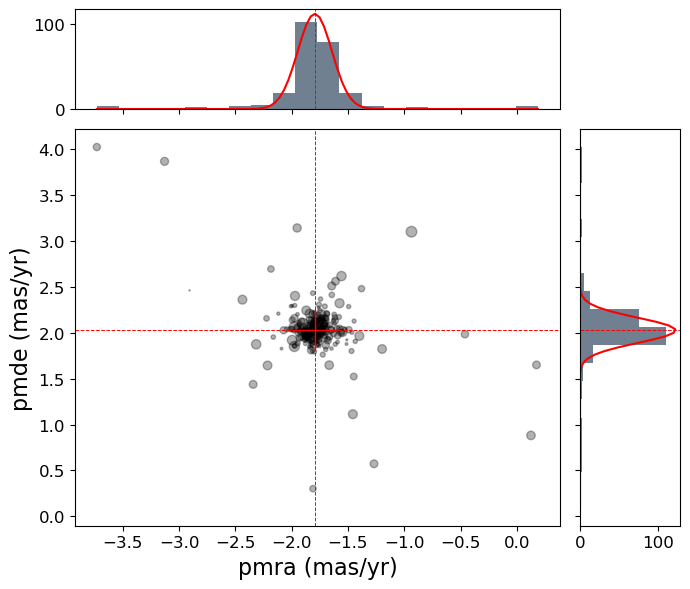

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [18]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data,"Plx_corr",20,50000)

In [19]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 105.8330


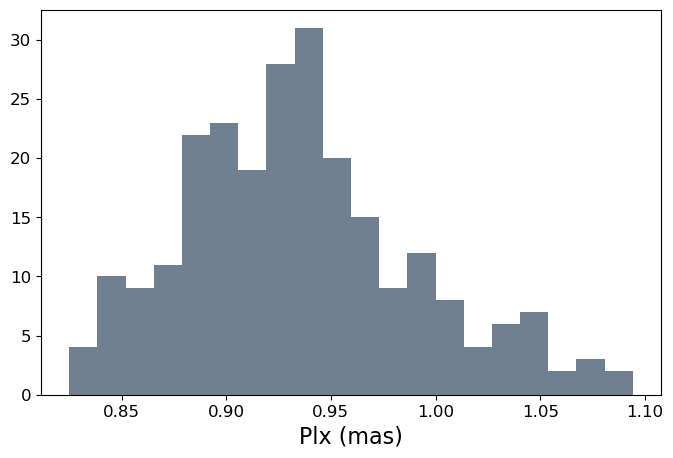

In [22]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
#ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
#ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)

## Second Analysis

In [23]:
pmra_cluster = params_pmra[1]
pmde_cluster = params_pmde[1]

sigma_ra = np.sqrt(params_ra[2])
sigma_de = np.sqrt(params_de[2])
sigma_pmra = np.sqrt(params_pmra[2])
sigma_pmde = np.sqrt(params_pmde[2])
sigma_plx = np.sqrt(params_plx[2])

/var/folders/b5/2856rntn7jnc98k223s4zmw00000gn/T/ipykernel_3281/410522067.py:8: RuntimeWarning: invalid value encountered in sqrt
  sigma_plx = np.sqrt(params_plx[2])


In [24]:
data2 = movprop_stat_filter(data,pmra_cluster,pmde_cluster,sigma_pmra,sigma_pmde, 3, "vizier")

In [25]:
population=data2

### RA, DEC

In [26]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data2,"RAJ2000","DEJ2000",20,0)

In [27]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 40.6486
DEC = 61.6170


Text(0, 0.5, 'DEC (deg)')

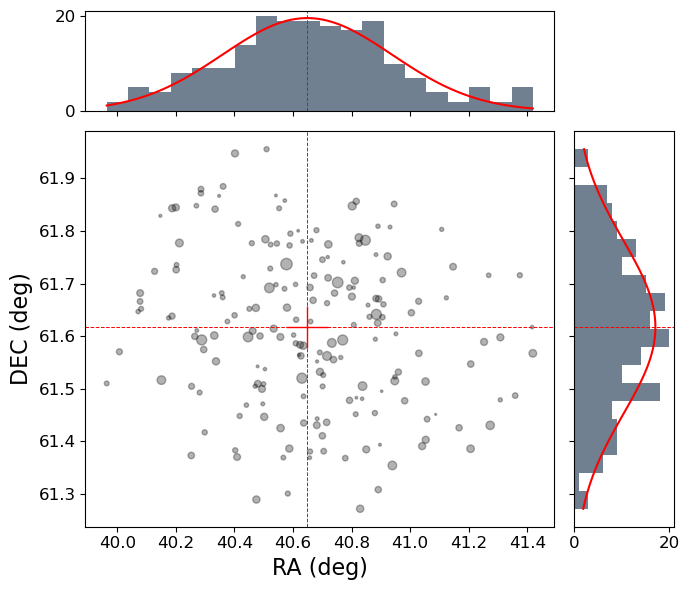

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [29]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data2,"pmRA","pmDE",20,0)

In [30]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -1.7930
pmDE = 2.0327


Text(0, 0.5, 'pmde (mas/yr)')

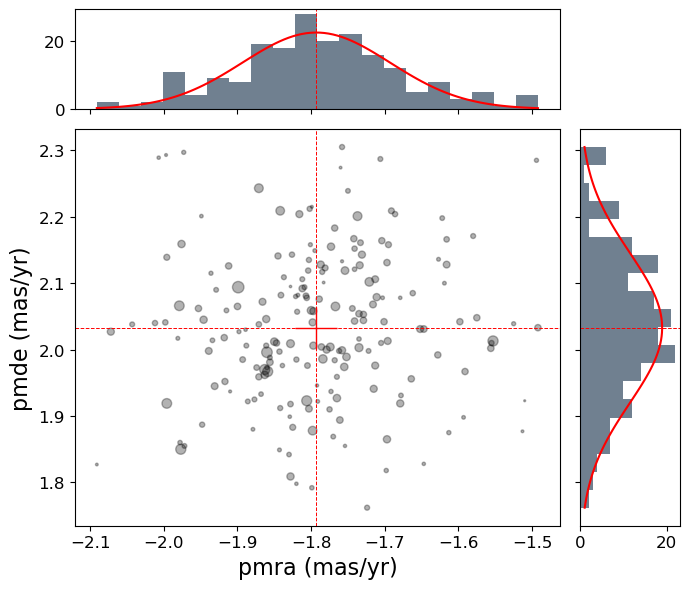

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [32]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data2,"Plx_corr",20,0)

In [33]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 0.9223


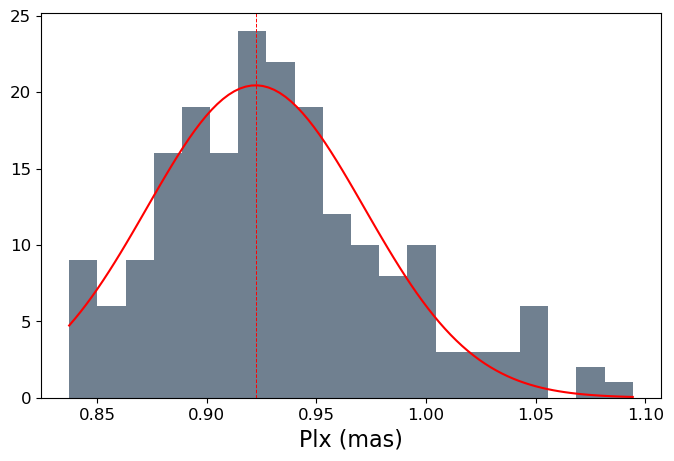

In [34]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)